<a href="https://colab.research.google.com/github/ajdillhoff/CSE6363/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import time
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

Load CIFAR10 dataset into google drive.

In [11]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
# Here specify the path to your directory
!ls "/content/gdrive/MyDrive/Data/CIFAR10" 
root_path = 'gdrive/MyDrive/Data/CIFAR10' 
path ='/content/gdrive/MyDrive/Data/CIFAR10'
os.chdir(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
train_dataset = torchvision.datasets.CIFAR10(root_path, download=True)
test_dataset = torchvision.datasets.CIFAR10(root_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting gdrive/MyDrive/Data/CIFAR10/cifar-10-python.tar.gz to gdrive/MyDrive/Data/CIFAR10
Files already downloaded and verified


(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F2A15328750>, 6)


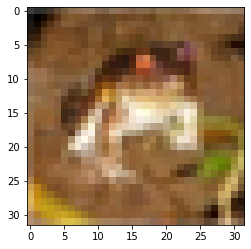

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(train_dataset[0][0])

# Helper Functions

We will add a few functions for model evaluations.

In [17]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


# Model Creation

We will now create a deep network for image classification.

In [54]:
model = nn.Sequential(
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10
)

In [43]:
# Model Parameters
batch_size = 32
learning_rate = 1e-3
epochs = 10
print_frequency = 100

In [59]:
from torchvision.transforms.transforms import ToPILImage
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_dataloader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10(root_path, train=True, transform=transforms.Compose([                                                                     
        transforms.ToTensor(),
        normalize,                                                                      
    ])),
    batch_size=batch_size, shuffle=True,
    num_workers=2, pin_memory=True)

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

In [30]:
def train(model, loader, criterion, optimizer):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    model.train()

    end = time.time()
    for i, (input, target) in enumerate(loader):

        data_time.update(time.time() - end)

        output = model(input)
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        output = output.float()
        loss = loss.float()

        prec = accuracy(output.data, target)[0]
        losses.update(loss.item(), input.shape[0])
        top1.update(prec.item(), input.shape[0])

        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_frequency == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                      epoch, i, len(loader), batch_time=batch_time,
                      data_time=data_time, loss=losses, top1=top1))

In [60]:
for epoch in range(epochs):
    train(model, train_dataloader, criterion, optimizer)

RuntimeError: ignored